
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions

1) Which are the top 10 movies having the highest budget_adj?
2) Which are the top 10 movies having the highest profits?
3) Which genre has the highest number of movie releases?
4) Which year has the highest number of movie releases?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
pd.options.display.max_rows = 9999
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

import pandas as pd

#pd.options.display.max_rows = 9999

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

Let's look at the data types and number of null values in data set.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning

To make the data consistent and clear for our anlaysis, we can the drop the columns mentioned below in the code which are not required.

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','imdb_id','budget','revenue','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace=True)

In [8]:
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


(   popularity                original_title  \
 0   32.985763                Jurassic World   
 1   28.419936            Mad Max: Fury Road   
 2   13.112507                     Insurgent   
 3   11.173104  Star Wars: The Force Awakens   
 4    9.335014                     Furious 7   
 
                                                 cast          director  \
 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
 1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
 2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
 3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
 4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   
 
    runtime                                     genres release_date  \
 0      124  Action|Adventure|Science Fiction|Thriller       6/9/15   
 1      120  Action|Adventure|Science Fiction|Thriller      5/13/15   
 2      119         Adventure|Science Fiction

As the percentage of null values of both the cast and genres are very mimimal , we can drop the rows having null values from both the columns.

In [9]:
df.dropna(inplace=True)

Let's see the summary statistics

In [10]:
df.describe()


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,1.073200e+04,1.073200e+04
mean,0.652609,102.467853,219.802739,5.964620,2001.260436,1.776644e+07,5.200147e+07
std,1.004757,30.492619,578.789325,0.930286,12.819831,3.446490e+07,1.454192e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210766,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387136,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720621,112.000000,148.000000,6.600000,2011.000000,2.111556e+07,3.470526e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that the minimum values of budget_adj and revenue_adj is 0,from which it is clear that there are rows with 0 value in these two columns, so we have to remove those rows from the dataset.

In [11]:
df = df[df['budget_adj'] != 0]
df = df[df['revenue_adj'] != 0]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 12 columns):
popularity        3850 non-null float64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 391.0+ KB


Check for duplicated values and drop if any

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

Verify any duplicated or null values exist

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum().any()

False

In [17]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,1.192933,109.217459,528.387114,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,1.475622,19.914141,880.333629,0.794697,11.285642,4.481360e+07,2.162018e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463337,95.000000,71.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,0.798582,106.000000,205.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,1.374300,119.000000,581.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
df.to_csv('tmdb_edited.csv',index=False)

In [19]:
df.shape

(3849, 12)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Top Movies based on features)

#### 1.a. Top movies based on budget_adj

To find out the movies taken with highest budget, we have to use groupby() and sort_values() function to group the movies in descending order.

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_edited=pd.read_csv('tmdb_edited.csv')
df_max_budget_movies=df_edited.groupby(['original_title'],as_index=False).budget_adj.max()
df_sorted_budget=df_max_budget_movies.sort_values('budget_adj',ascending=False).reset_index(drop=True)
df_sorted_budget

,original_title,budget_adj
0,The Warrior's Way,4.250000e+08
1,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
2,Pirates of the Caribbean: At World's End,3.155006e+08
3,Superman Returns,2.920507e+08
4,Titanic,2.716921e+08
5,Spider-Man 3,2.713305e+08
6,Tangled,2.600000e+08
7,Avengers: Age of Ultron,2.575999e+08
8,Harry Potter and the Half-Blood Prince,2.541001e+08
9,Waterworld,2.504192e+08


Using head(10) find the top 10 high budgeted movies.

In [21]:
df_top10_budget=df_sorted_budget.head(10)
df_top10_budget

,original_title,budget_adj
0,The Warrior's Way,4.250000e+08
1,Pirates of the Caribbean: On Stranger Tides,3.683713e+08
2,Pirates of the Caribbean: At World's End,3.155006e+08
3,Superman Returns,2.920507e+08
4,Titanic,2.716921e+08
5,Spider-Man 3,2.713305e+08
6,Tangled,2.600000e+08
7,Avengers: Age of Ultron,2.575999e+08
8,Harry Potter and the Half-Blood Prince,2.541001e+08
9,Waterworld,2.504192e+08


Plot a histogram of (1d variable) **budget_adj**.

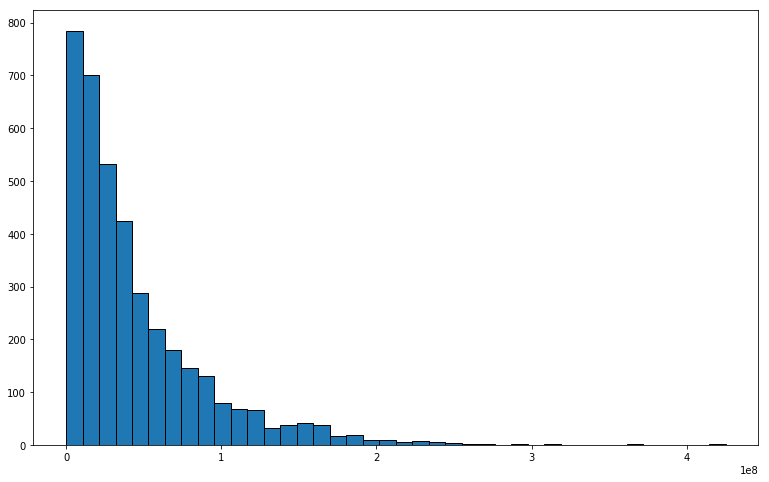

In [22]:
df['budget_adj'].hist(grid=False,bins=40,edgecolor='black',figsize=(13,8))

Now plot  a bar chart(2d variable) using matplotlib.

In [23]:
def myGrpPlot(df,grpVar,yVar,stat='max',top=10,color='orange',figsize=(14,6)):
    # for plotting a bar chart
    data_all=df.groupby([grpVar])[yVar].agg(stat).sort_values(ascending=False)
    if top:
        data=data_all.head(top).copy()
    else:    
        data=data_all.copy()
    data.sort_index(ascending=True).plot.barh(edgecolor='black',figsize=figsize,rot=0,width=0.8,color=color)
    plt.title(f'{stat} of {yVar} by {grpVar}'.title(),fontsize=14,weight="bold")
    plt.ylabel(grpVar.title(),fontsize=10,weight="bold")
    plt.xlabel(f'{stat} {yVar}'.title(),fontsize=10,weight="bold")
    return data_all


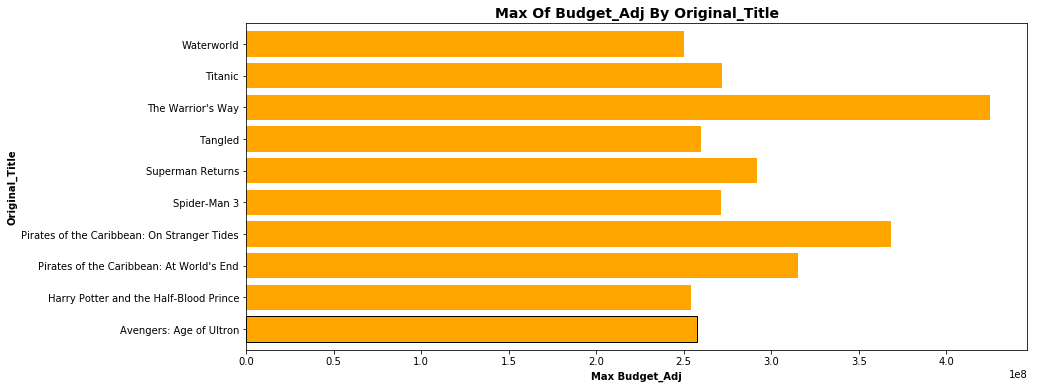

In [24]:
data=myGrpPlot(df,'original_title','budget_adj')

Among the top 10 movies having highest budget, 'The Warrior's Way' stands as top 1 highest budgeted movie and 'Waterworld' stands as top10 highest budgeted movie

#### 1.b.Top movies based on profit

To find the movies which have higher profits, we first need to create a new column named 'profit' into the dataset.

In [25]:
df_edited['profit']=df_edited['revenue_adj']-df_edited['budget_adj']


In [26]:
df_edited.head()

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


Use groupby() and sort_values() function to group the movies in descending order based on the profits.

In [27]:
df_max_profit_movies=df_edited.groupby(['original_title'],as_index=False).profit.max()
df_sorted_profit=df_max_profit_movies.sort_values('profit',ascending=False).reset_index(drop=True)
df_sorted_profit

,original_title,profit
0,Star Wars,2.750137e+09
1,Avatar,2.586237e+09
2,Titanic,2.234714e+09
3,The Exorcist,2.128036e+09
4,Jaws,1.878643e+09
5,E.T. the Extra-Terrestrial,1.767968e+09
6,Star Wars: The Force Awakens,1.718723e+09
7,The Net,1.551568e+09
8,One Hundred and One Dalmatians,1.545635e+09
9,The Empire Strikes Back,1.376998e+09


In [28]:
df_top10_profit=df_sorted_profit.head(10)
df_top10_profit

,original_title,profit
0,Star Wars,2.750137e+09
1,Avatar,2.586237e+09
2,Titanic,2.234714e+09
3,The Exorcist,2.128036e+09
4,Jaws,1.878643e+09
5,E.T. the Extra-Terrestrial,1.767968e+09
6,Star Wars: The Force Awakens,1.718723e+09
7,The Net,1.551568e+09
8,One Hundred and One Dalmatians,1.545635e+09
9,The Empire Strikes Back,1.376998e+09


Plot a histogram of (1d variable) **profit**.

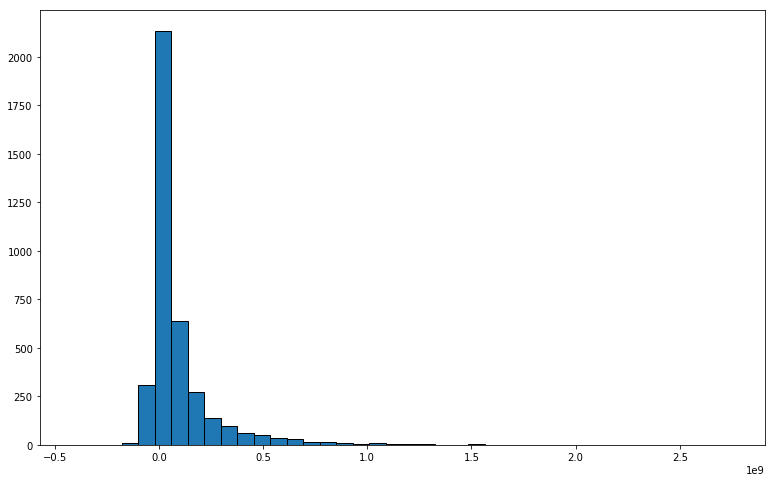

In [29]:
df_edited['profit'].hist(grid=False,bins=40,edgecolor='black',figsize=(13,8))

Plot a bar chart(2d variable) using matplotlib.

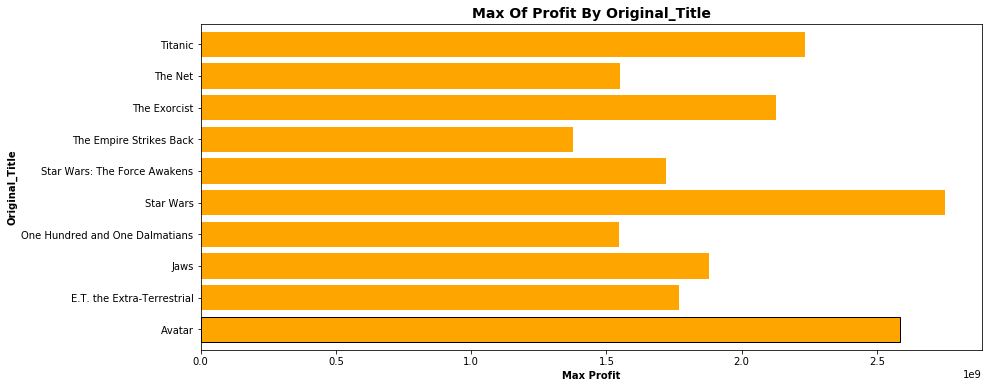

In [30]:
data=myGrpPlot(df_edited,'original_title','profit')

Among the top 10 movies having highest profit, **'Star Wars'** stands as top 1 highest profitable movie and **'The Empire Strikes Back'** stands as top10 highest profitable movie.

### Research Question 2  (Highest number of releases based on different features)

#### 2.a Highest number of releases based on genre

We can see that the column 'genres' is having multiple values with a | seperator, so to carry out analysis let's use the explode and split function to create multiple rows of genres for a single movie.

In [31]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df=df.assign(genres=df['genres'].str.split('|')).explode('genres')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Now we have to use value_counts() function to find the count of movies in different genres

In [32]:
genre_count=df['genres'].value_counts(ascending=False)
genre_count

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

Using the above results, plot a bar chart using matplotlib.

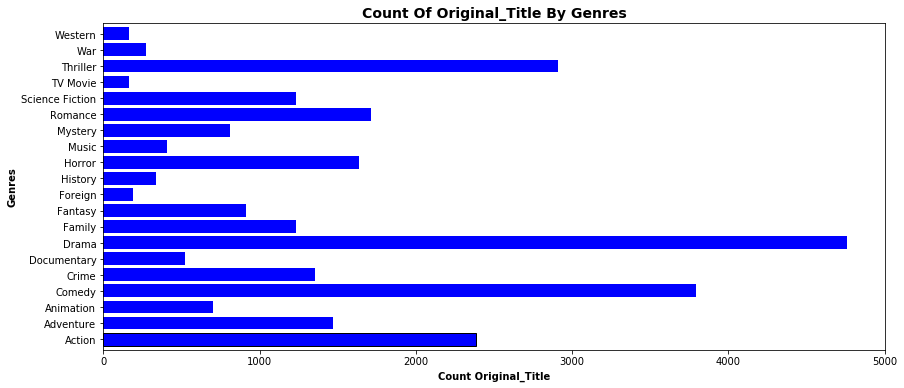

In [33]:
top=df['genres'].unique().shape[0]
data=myGrpPlot(df,'genres','original_title',stat='count',top=top,color='blue')

Among all the genres, 'Drama' has the highest number of movie releases and 'Western' has the least number of movie releases.

#### 2.b. Which year has the highest number of releases?

Now we have to use groupby() function to find the count of movies in different years.

In [34]:
year_releases=df.groupby(['release_year'],as_index=False).id.count()
year_releases_sorted=year_releases.sort_values('id',ascending=False).reset_index(drop=True)
year_releases_sorted

,release_year,id
0,2014,1471
1,2015,1388
2,2013,1386
3,2009,1360
4,2012,1279
5,2011,1278
6,2008,1240
7,2010,1218
8,2007,1126
9,2006,1044


Using the above results, plot a bar chart using matplotlib.

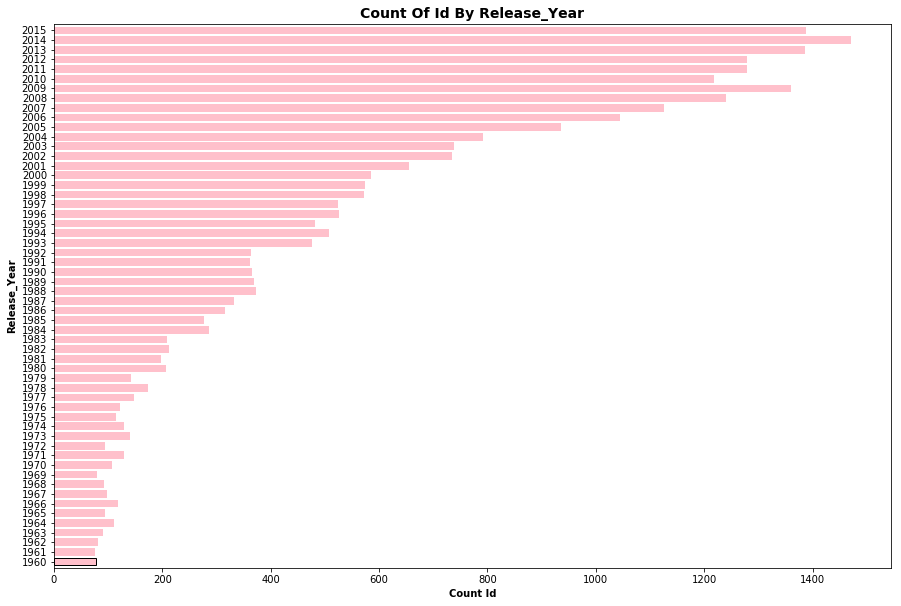

In [35]:
top=df['release_year'].unique().shape[0]
data=myGrpPlot(df,'release_year','id',stat='count',top=top,color='pink',figsize=(15,10))

From 1960-2015, the year with most number of movie releases is in **2014**.

## Conclusions

1.a- Among the top 10 movies having highest budget, **'The Warrior's Way'** stands as top 1 highest budgeted movie and **'Waterworld'** stands as top10 highest budgeted movie.

1.b- Among the top 10 movies having highest profit, **'Star Wars'** stands as top 1 highest profitable movie and **'The Empire Strikes Back'** stands as top10 highest profitable movie.

2.a-Among all the genres, **'Drama'** has the highest number of movie releases and **'Western'** has the least number of movie releases from 1960-2015.

2.b-From 1960-2015, the year with most number of movie releases is in **2014**.

## Limitations

1.The budget and revenue columns do not have currency unit as it might vary based on region,so we cannot make a perfect analysis regarding the movies involving highest budget and revenue.
The analysis is based on the assumption that they have similar currency unit for all movies.

2.There are missing values of budget and revenue in the dataset,so we need to drop them and consider only available data for our analysis.

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0